In [3]:
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets

%matplotlib inline
%config InlineBackend.figure_format = "svg"

from IPython.display import display, Math, Latex
import pandas as pd

data = pd.read_csv("fires_thefts.csv", names=["x", "y"])
x = data["x"].to_numpy()
y = data["y"].to_numpy()

print(data)

       x    y
0    6.2   29
1    9.5   44
2   10.5   36
3    7.7   37
4    8.6   53
5   34.1   68
6   11.0   75
7    6.9   18
8    7.3   31
9   15.1   25
10  29.1   34
11   2.2   14
12   5.7   11
13   2.0   11
14   2.5   22
15   4.0   16
16   5.4   27
17   2.2    9
18   7.2   29
19  15.1   30
20  16.5   40
21  18.4   32
22  36.2   41
23  39.7  147
24  18.5   22
25  23.3   29
26  12.2   46
27   5.6   23
28  21.8    4
29  21.6   31
30   9.0   39
31   3.6   15
32   5.0   32
33  28.6   27
34  17.4   32
35  11.3   34
36   3.4   17
37  11.9   46
38  10.5   42
39  10.7   43
40  10.8   34
41   4.8   19


<font color = 'hotpink'> I want to draw correlation between fires and thefts and based on that make predictions of amount of thefts. We need thetas for hypothesis function and cost function</font>

In [4]:
def h(theta, x):
    return theta[0] + theta[1] * x

def J(h, theta, x, y):
    m = len(y)
    return 1.0 / (2 * m) * sum((h(theta, x[i]) - y[i]) ** 2 for i in range(m))

def costfun(fun, x, y):
    return lambda theta: J(fun, theta, x, y)




def LatexMatrix(matrix):
    ltx = r"\left[\begin{array}"
    m, n = matrix.shape
    ltx += "{" + ("r" * n) + "}"
    for i in range(m):
        ltx += r" & ".join([("%.4f" % j.item()) for j in matrix[i]]) + r" \\\\ "
    ltx += r"\end{array}\right]"
    return ltx

def gradient_descent(h, cost_fun, theta, x, y, alpha, eps):
    current_cost = cost_fun(h, theta, x, y)
    history = [
        [current_cost, theta]
    ] 
    m = len(y)
    while True:
        new_theta = [
            theta[0] - alpha / float(m) * sum(h(theta, x[i]) - y[i] for i in range(m)),
            theta[1]
            - alpha / float(m) * sum((h(theta, x[i]) - y[i]) * x[i] for i in range(m)),
        ]
        theta = new_theta  
        try:
            prev_cost = current_cost
            current_cost = cost_fun(h, theta, x, y)
        except OverflowError:
            break
        if abs(prev_cost - current_cost) <= eps:
            break
        history.append([current_cost, theta])
    return theta, history

In [5]:
best_theta, history = gradient_descent(h, J, [0.0, 0.0], x, y, alpha=0.001, eps=0.00001)

display(
    Math(
        r"\large\textrm{Result:}\quad \theta = "
        + LatexMatrix(np.matrix(best_theta).reshape(2, 1))
        + (r" \quad J(\theta) = %.4f" % history[-1][0])
        + r" \quad \textrm{after %d iterations}" % len(history)
    )
)

<IPython.core.display.Math object>

In [6]:
print(["50 fires = ", h(best_theta, 50),"100 fires = ", h(best_theta, 100), "200 fires= ", h(best_theta, 200)]) 

['50 fires = ', 83.08826260735549, '100 fires = ', 149.45814734224862, '200 fires= ', 282.1979168120349]


<font color = 'hotpink'>Just as a fun fact, let's see a plot showing amount of steps and cost function based o</font>

In [13]:
def eps_cost_steps_plot(eps, costs, steps):
    fig, ax1 = plt.subplots()
    ax2 = ax1.twinx()
    ax1.plot(eps, steps, "-s", color="deeppink")
    ax2.plot(eps, costs, "-o", color="mediumvioletred")
    ax1.set_xscale("log")
    ax1.set_xlabel("eps")
    ax1.set_ylabel("Amount of steps", color="deeppink")
    ax2.set_ylabel("Cost", color="mediumvioletred")
    plt.show()

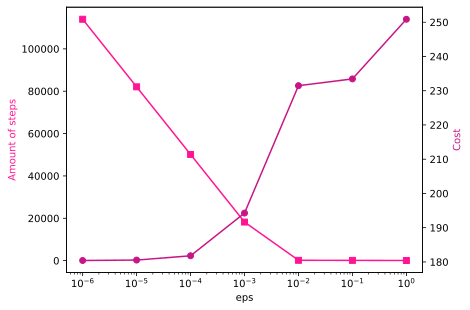

In [15]:
eps_cost_steps_plot(epss, costs, lengths)